<a href="https://colab.research.google.com/github/haynapasi050505/supervised-machine-learning-regression-NYC-taxi-trip/blob/main/Copy_123of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import seaborn as sns
sns.set()


In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset file Path
dir_path = '/content/drive/MyDrive/NYC Taxi Data.csv'

In [4]:
# reading the file
df = pd.read_csv(dir_path)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
# column names in our dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#shape of dataset
df.shape

(1458644, 11)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


The returned table gives certain insights:

1. There are no numerical columns with missing data
2. The passenger count varies between 1 and 9 with most people number of people being  1 or 2 we can observe that there is minimum value is 0 in pasenger count ehich is unjustified 


In [ ]:
# checking for value counts in passenger counnt
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

Here, the no of records with passenger count 0 ,9 and 7 are very small compared to the entire data set. hence, we will drop the values

In [5]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

In [ ]:
# checking for missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We dont have any null values in any column.

In [ ]:
# checking for data type of our columns
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

The 2 coumns pickup_datetime and dropoff_datetime is object type.
we are now going to convert them in datetime format

In [6]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

In [7]:
#converting dates into days of the week
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
# counting the values for each day for pickup
df['pickup_day'].value_counts()

Friday       223521
Saturday     220855
Thursday     218566
Wednesday    210132
Tuesday      202745
Sunday       195352
Monday       187408
Name: pickup_day, dtype: int64

In [ ]:
# counting the values for each day for dropoff
df['dropoff_day'].value_counts()

Friday       223020
Saturday     220888
Thursday     217738
Wednesday    209786
Tuesday      202513
Sunday       197210
Monday       187424
Name: dropoff_day, dtype: int64

In [8]:
def timezone(x):
  if x >= datetime.time(4,0,1) and x <= datetime.time(10,0,0):
    return 'morning'
  if x>= datetime.time(10,0,1) and x<= datetime.time(16 , 0, 0):
    return'midday'
  if x >= datetime.time(16,0,1) and x<= datetime.time(22,0,0):
    return'evening'
  elif x<= datetime.time(22,0,1) or x<= datetime.time(4,0,0):
    return 'late night'

In [9]:
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [10]:
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [11]:
df['pickup_hour']= df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [12]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


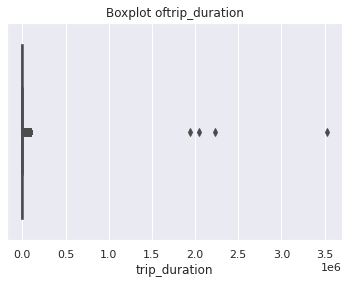

In [13]:
sns.boxplot(df['trip_duration'])
plt.title('Boxplot oftrip_duration')
plt.show()

In [14]:
df = df[df.trip_duration < 90000]  #you have to run this code 4 times

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


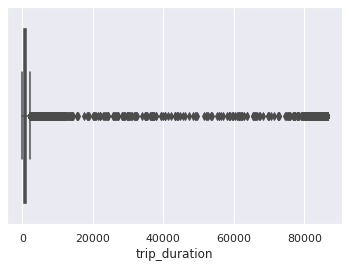

In [15]:
sns.boxplot(df['trip_duration'])

In [ ]:
print(len(df[df.trip_duration == 0]))

0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


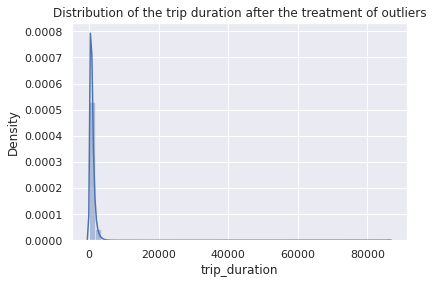

In [ ]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the trip duration after the treatment of outliers')
plt.show()


In [ ]:
bins = np.array([0,1800,3600,5400,7200,90000])
df['duration_time'] = pd.cut(df.trip_duration,bins,labels=["<5" , "5-10" , "10-15" , "15-20", ">20"])

In [ ]:
df.duration_time

0            <5
1            <5
2          5-10
3            <5
4            <5
           ... 
1458639      <5
1458640      <5
1458641      <5
1458642      <5
1458643      <5
Name: duration_time, Length: 1458575, dtype: category
Categories (5, object): ['<5' < '5-10' < '10-15' < '15-20' < '>20']

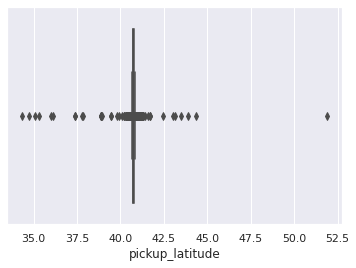

In [ ]:
sns.boxplot(x=df['pickup_latitude'])
plt.show()

In [ ]:
df = df[df.pickup_latitude < 42.5]
df = df[df.pickup_latitude > 40.0]
  #you have to run this code 4 times

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


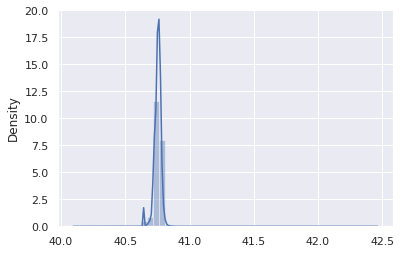

In [ ]:
sns.distplot(x=df['pickup_latitude'])
plt.show()

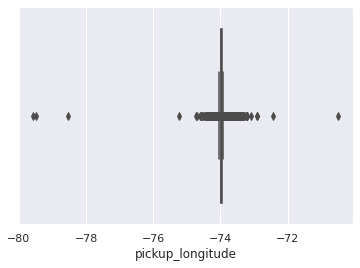

In [ ]:
sns.boxplot(x=df['pickup_longitude'])
plt.show()

In [ ]:
df = df[df.pickup_longitude < -73]
df = df[df.pickup_longitude > -75.3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


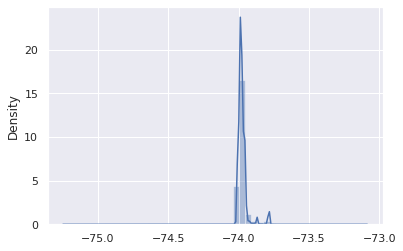

In [ ]:
sns.distplot(x=df['pickup_longitude'])
plt.show()

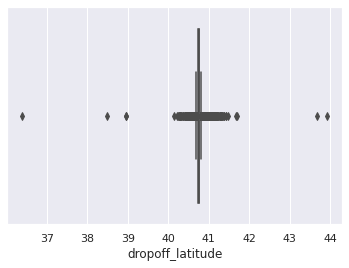

In [ ]:
sns.boxplot(x=df['dropoff_latitude'])
plt.show()

In [ ]:
df = df[df.dropoff_latitude < 42.5]
df = df[df.dropoff_latitude > 40.0]

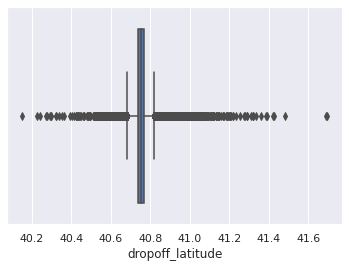

In [ ]:
sns.boxplot(x=df['dropoff_latitude'])
plt.show()

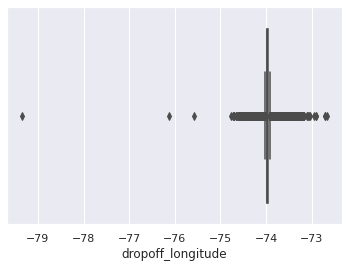

In [ ]:
sns.boxplot(x=df['dropoff_longitude'])
plt.show()

In [ ]:
df = df[df.dropoff_longitude > -75]  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


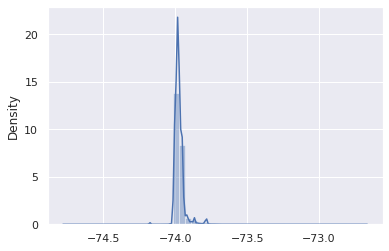

In [ ]:
sns.distplot(x=df['dropoff_longitude'])
plt.show()

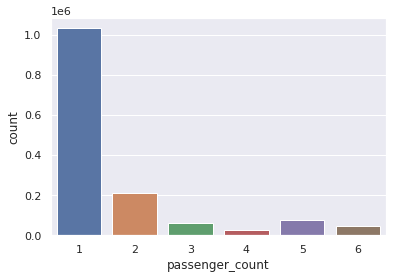

In [ ]:
sns.countplot(x=df['passenger_count'] , data=df)
plt.show()

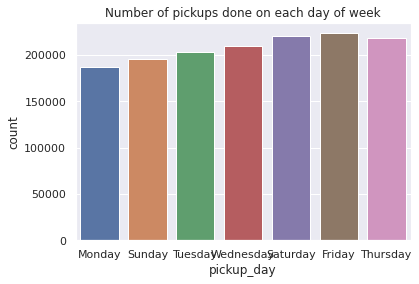

In [ ]:
sns.countplot(x=df['pickup_day'])
plt.title('Number of pickups done on each day of week')
plt.show()

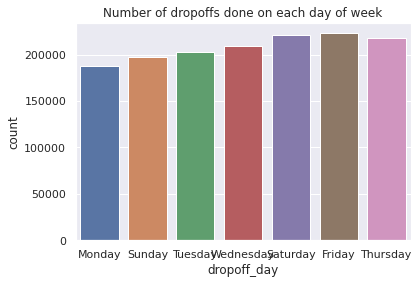

In [ ]:
sns.countplot(x=df['dropoff_day'])
plt.title('Number of dropoffs done on each day of week')
plt.show()

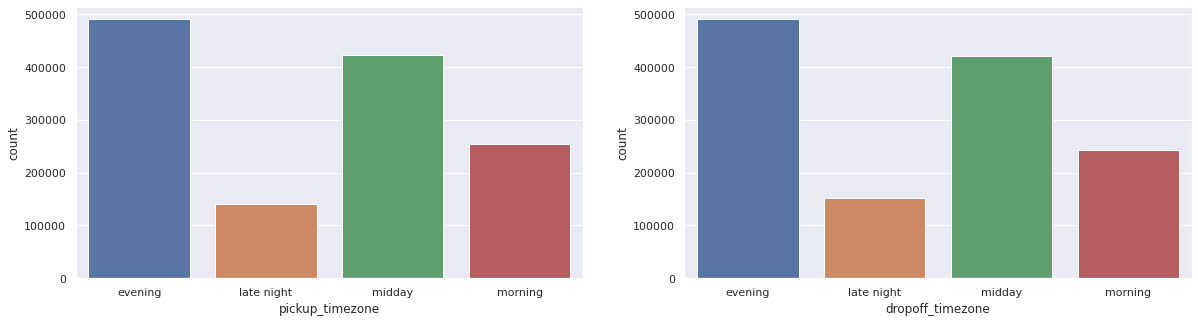

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_timezone' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_timezone' , data = df , ax= ax2)


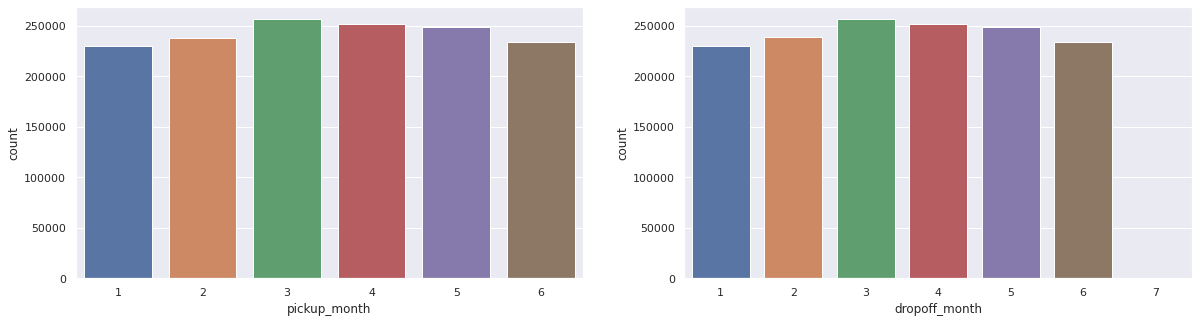

In [ ]:
figure, (ax1,ax2)=plt.subplots(ncols=2 , figsize=(20,5))
ax=sns.countplot(x='pickup_month' , data = df , ax= ax1)
ax=sns.countplot(x='dropoff_month' , data = df , ax= ax2)


Text(0.5, 1.0, 'Distribution plot of dropoff hours')

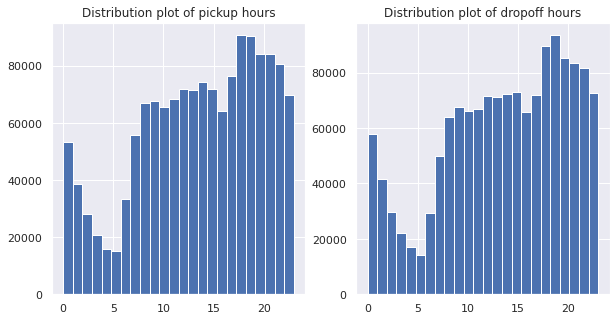

In [ ]:
figure,ax=plt.subplots(nrows=1 , ncols=2 , figsize = (10,5))
df.pickup_hour.hist(bins=24 , ax=ax[0])
ax[0].set_title('Distribution plot of pickup hours')
df.dropoff_hour.hist(bins=24 , ax= ax[1])
ax[1].set_title('Distribution plot of dropoff hours')

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1450533
Y       8042
Name: store_and_fwd_flag, dtype: int64

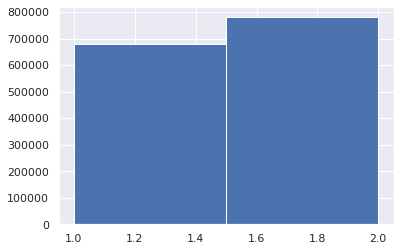

In [ ]:
df['vendor_id'].hist(bins=2)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'duration_time'],
      dtype='object')

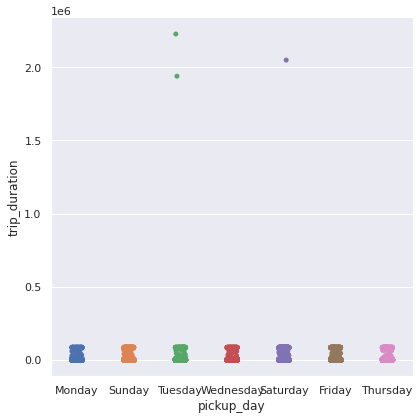

In [ ]:
sns.catplot(x='pickup_day' , y='trip_duration' , kind = "strip" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

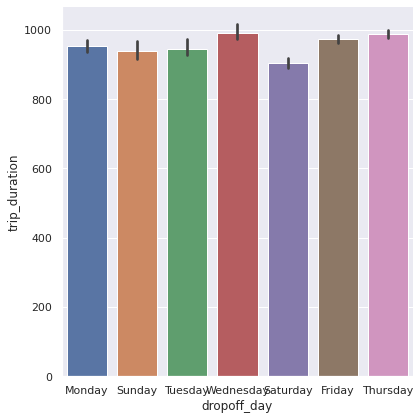

In [ ]:
sns.catplot(x='dropoff_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

Text(0.5, 1.0, 'The distribution of percentage of different duration of trips')

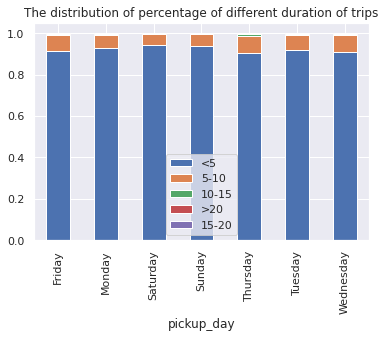

In [ ]:
ax1 = df.groupby('pickup_day')['duration_time'].value_counts(normalize = True).unstack()
ax1.plot(kind='bar' , stacked = True)
plt.title('The distribution of percentage of different duration of trips')

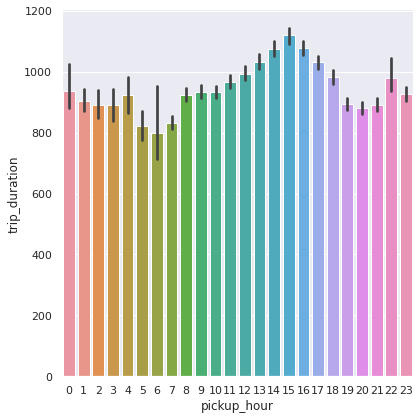

In [ ]:
sns.catplot(x='pickup_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

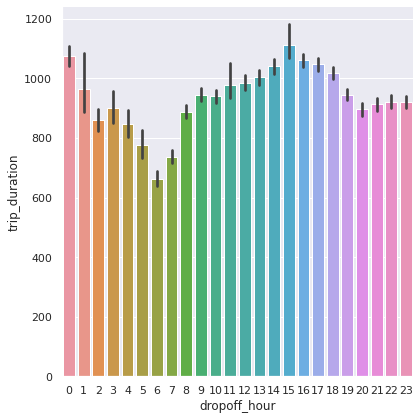

In [ ]:
sns.catplot(x='dropoff_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


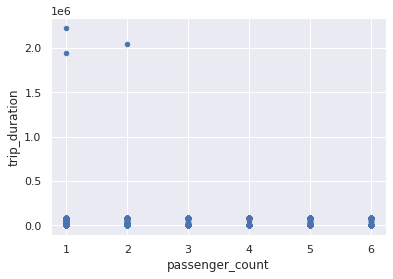

In [ ]:
df.plot.scatter( x= 'passenger_count', y='trip_duration' )

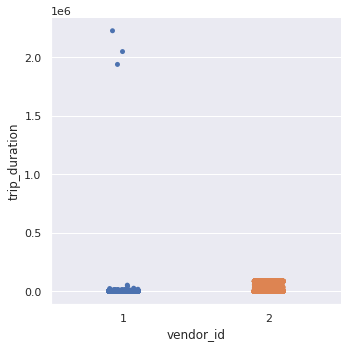

In [ ]:
sns.catplot(x='vendor_id' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

In [ ]:
sns.catplot(x='store_and_fwd_flag' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

In [ ]:
sns.catplot(y='trip_duration' , x='passenger_count' , data = df )

In [16]:
df['trip_duration_hour'] = df['trip_duration']/3600

In [17]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
  lat1 = df.pickup_latitude 
  lon1 = df.pickup_longitude 
  lat2 = df.dropoff_latitude
  lon2 = df.dropoff_longitude
  R = 3959.87433 
  #this is in miles. For earth radius inkilometers use 6372.8 km
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
  return R*c


In [18]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

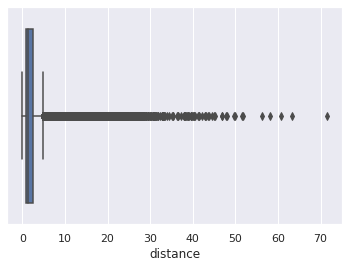

In [ ]:
sns.boxplot(x=df['distance'])
plt.show()

In [19]:
print(len(df[df.distance == 0]))

5887


In [ ]:

df = df[df.distance < 45]

In [20]:
mean_dist = df['distance'].mean()
df.loc[df['distance']==0 , 'distance']=mean_dist

In [21]:
df['speed']=df['distance']/df['trip_duration_hour']

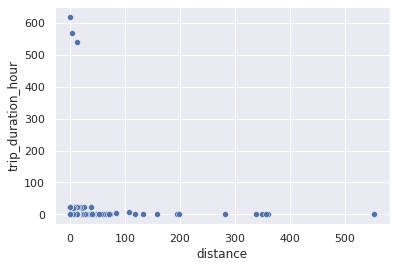

In [ ]:
sns.scatterplot(x='distance' , y = 'trip_duration_hour' , data = df)

In [ ]:
print(len(df[df.distance == 0]))

0


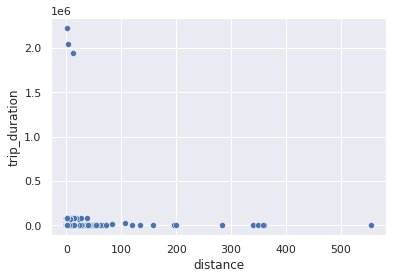

In [ ]:
sns.scatterplot(data=df , x='distance' , y='trip_duration')

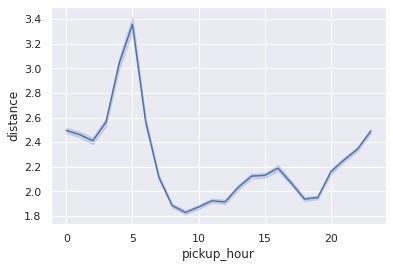

In [ ]:
sns.lineplot(x='pickup_hour' , y='distance' , data = df)

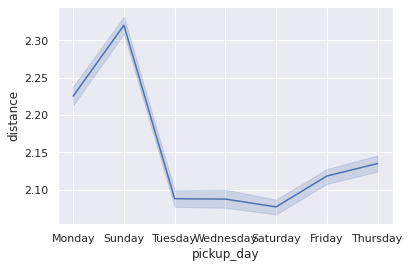

In [ ]:
sns.lineplot(x='pickup_day' , y='distance' , data = df)

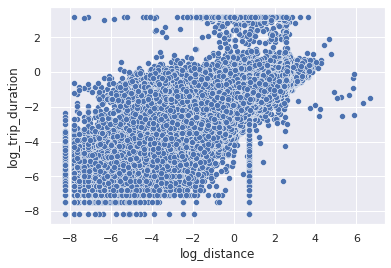

In [22]:
df['log_distance']=np.log(df.distance)
df['log_trip_duration']=np.log(df.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df)

In [23]:
df=df[df.log_trip_duration<2]

In [24]:
data2 = df.loc[:,['passenger_count' , 'store_and_fwd_flag' , 'trip_duration' , 'pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone' , 'speed' ,'log_distance' , 'distance']]

In [25]:
data2 = pd.get_dummies(data2 , columns=['store_and_fwd_flag','pickup_day' , 'dropoff_day' , 'pickup_month' , 'dropoff_month' , 'pickup_timezone' , 'dropoff_timezone'])

In [26]:
x = data2.drop(['trip_duration'] , axis=1)
y= data2['trip_duration']

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.20 , random_state = 7)

In [38]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train , y_train)

LinearRegression()

In [39]:
y_pred = ml.predict(x_test)
print(y_pred)

[436.9504409  913.82081239 683.81702472 ... 497.58685151 128.62659501
 840.05057712]


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.5645223757020486

Text(0, 0.5, 'Predicted')

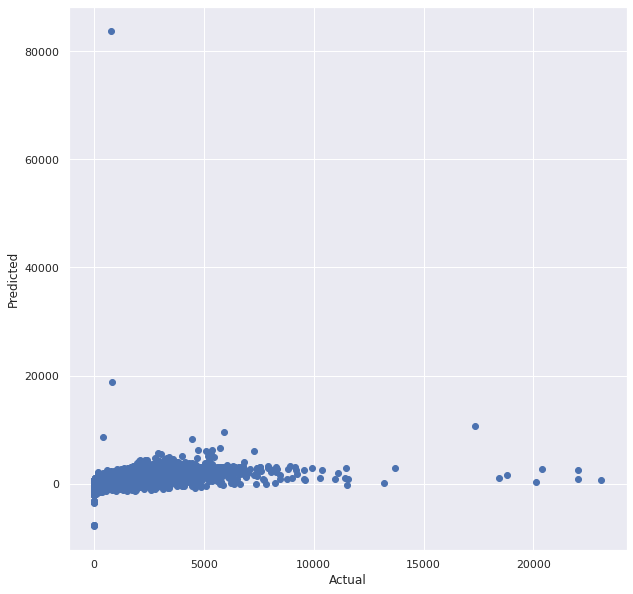

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

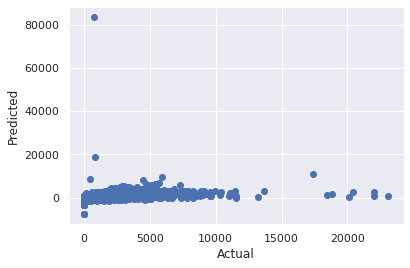

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [43]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
97854,360,436.950441,-76.950441
872653,1212,913.820812,298.179188
109066,623,683.817025,-60.817025
540807,569,676.598225,-107.598225
624036,466,619.468520,-153.468520
...,...,...,...
1018950,513,786.884164,-273.884164
138298,1711,2126.926165,-415.926165
1225162,362,497.586852,-135.586852
51029,317,128.626595,188.373405


In [44]:
data2.shape

(1456536, 42)

In [45]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 194897.10379973115
RMSE : 441.47152093847586


In [46]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 263.0552906673486


In [47]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(bootstrap = True, max_depth = 7 , max_features=15 , min_samples_leaf =3 , min_samples_split = 10,n_estimators = 200 , random_state = 7)

In [48]:
rfc.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_features=15, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200, random_state=7)

In [49]:
y_pred=rfc.predict(x_test)

In [50]:
r2_score(y_test, y_pred)

0.9069436685653032

In [51]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 41647.16732826082
RMSE : 204.07637621307572


In [52]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 98.2212432639646


Text(0, 0.5, 'Predicted')

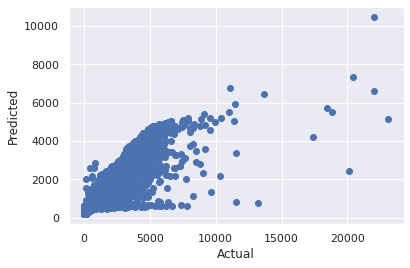

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

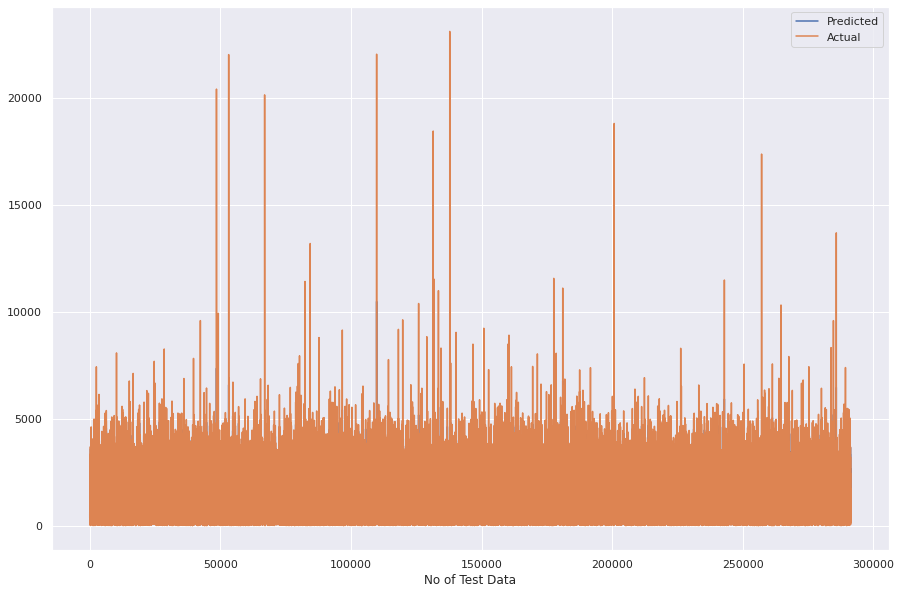

In [59]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


In [55]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
97854,360,372.095834,-12.095834
872653,1212,1128.347620,83.652380
109066,623,611.857265,11.142735
540807,569,545.030657,23.969343
624036,466,446.062814,19.937186
...,...,...,...
1018950,513,572.875678,-59.875678
138298,1711,1799.220511,-88.220511
1225162,362,392.140778,-30.140778
51029,317,432.042512,-115.042512


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [29]:
ensemble.fit(x_train,y_train)

GradientBoostingRegressor()

In [30]:
y_pred=ensemble.predict(x_test)

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
r2_score(y_test, y_pred)

0.9881166623207203

In [33]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 5318.363029328056
RMSE : 72.92710764405822


In [34]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)

MAE : 30.676635005909215


Text(0, 0.5, 'Predicted')

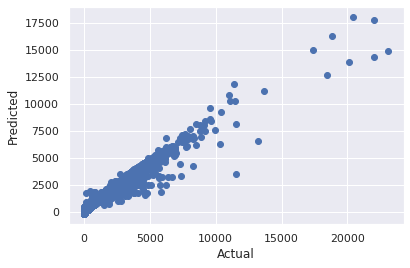

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

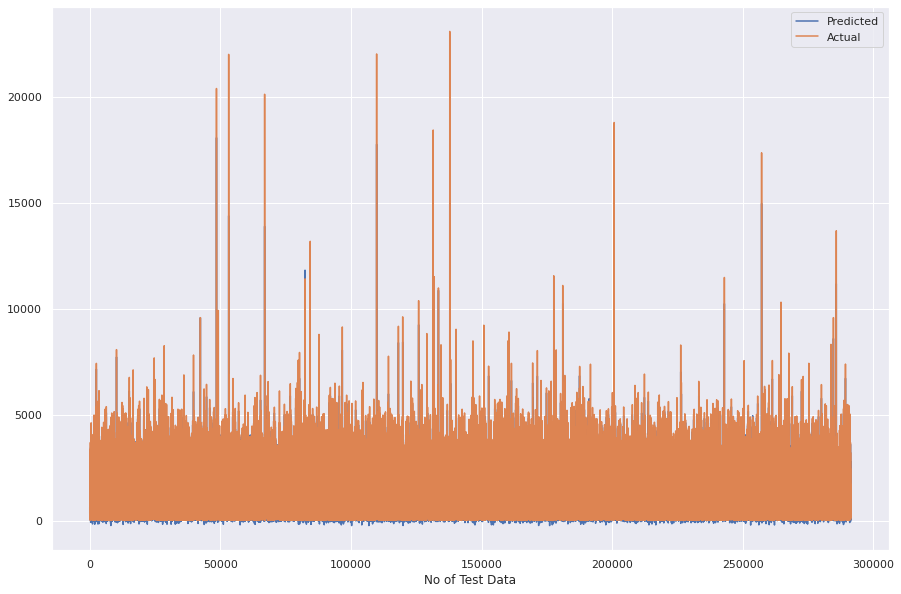

In [36]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()


Text(0, 0.5, 'Predicted')

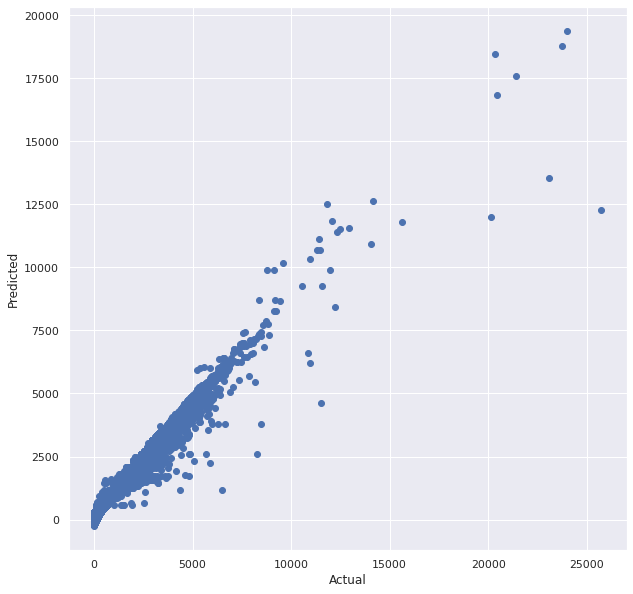

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [37]:
pred_y_df = pd.DataFrame({'Actual value' : y_test , 'Predicted value': y_pred , 'Differance': y_test-y_pred})
pred_y_df

,Actual value,Predicted value,Differance
97854,360,354.563185,5.436815
872653,1212,1210.674664,1.325336
109066,623,601.944155,21.055845
540807,569,547.725276,21.274724
624036,466,468.872108,-2.872108
...,...,...,...
1018950,513,532.155744,-19.155744
138298,1711,1749.578048,-38.578048
1225162,362,381.539977,-19.539977
51029,317,377.408725,-60.408725
